## Build the Random Forest model using scikit learn in boston data to predict 'Price' based on other dependent variable.

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
from statistics import mean
from sklearn import metrics
import statsmodels.api as sms

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)

In [4]:
df['Price']= boston.target

In [5]:
df.shape

(506, 14)

### Data Description

* crim - per capita crime rate by town.

* zn - proportion of residential land zoned for lots over 25,000 sq.ft.

* indus - proportion of non-retail business acres per town.

* chas - Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

* nox - nitrogen oxides concentration (parts per 10 million).

* rm - average number of rooms per dwelling.

* age - proportion of owner-occupied units built prior to 1940.

* dis - weighted mean of distances to five Boston employment centres.

* rad - index of accessibility to radial highways.

* tax - full-value property-tax rate per \$10,000.

* ptratio - pupil-teacher ratio by town.

* black - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

* lstat - lower status of the population (percent).

* Price - median value of owner-occupied homes in \$1000s.

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Data Preprocessing

Check if any null data present

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

There is no null values associated with the dataset

### Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Finding out the correlation between the features

In [10]:
corr = df.corr()
corr.shape

(14, 14)

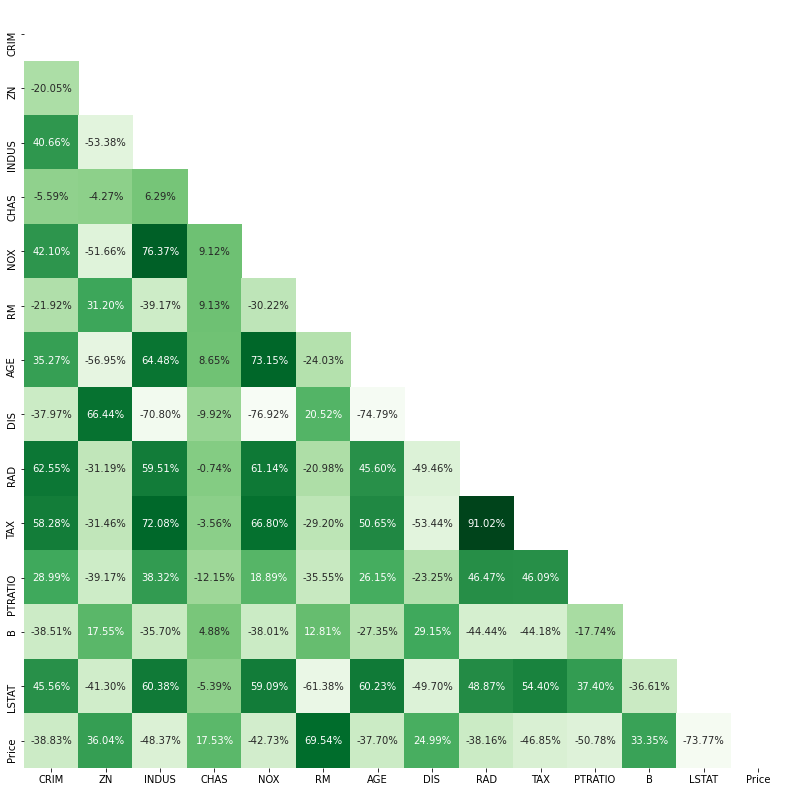

In [11]:
plot.figure(figsize=(14,14))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask,cbar=False,square=True,fmt='.2%', cmap='Greens',annot=True)

Checking any null vlaues missing using heatmap

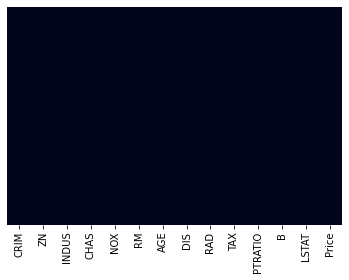

In [12]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

Confirmed there is no null value associated.

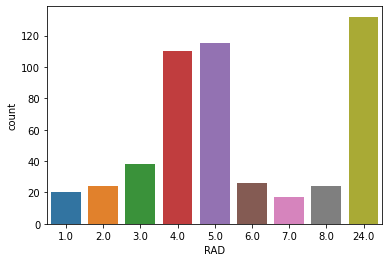

In [13]:
sns.countplot(x='RAD', data=df)

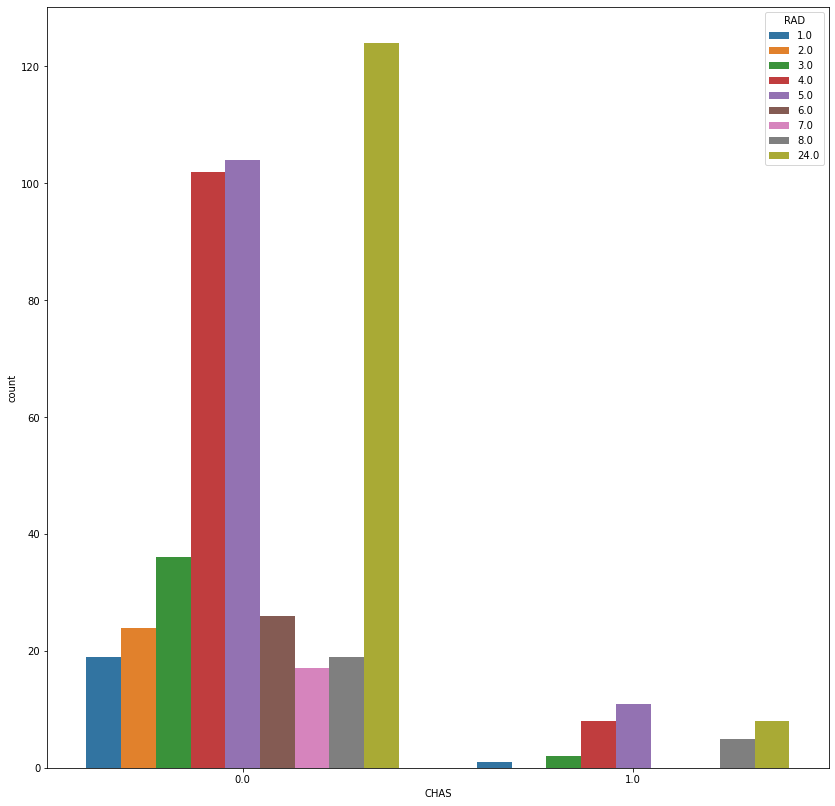

In [14]:
plot.figure(figsize=(14,14))
sns.countplot(x='CHAS', hue='RAD', data=df)

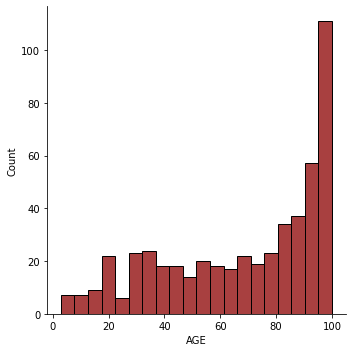

In [15]:
sns.displot(df['AGE'].dropna(),kde=False,color='darkred',bins=20)

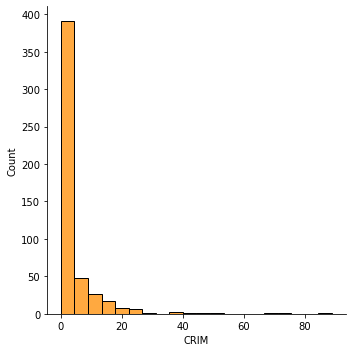

In [16]:
sns.displot(df['CRIM'].dropna(),kde=False,color='darkorange',bins=20)

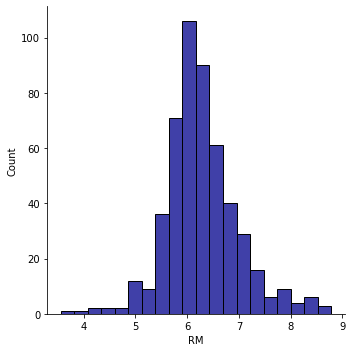

In [17]:
sns.displot(df['RM'].dropna(), kde=False, color='darkblue', bins=20)

### Outliers Detection

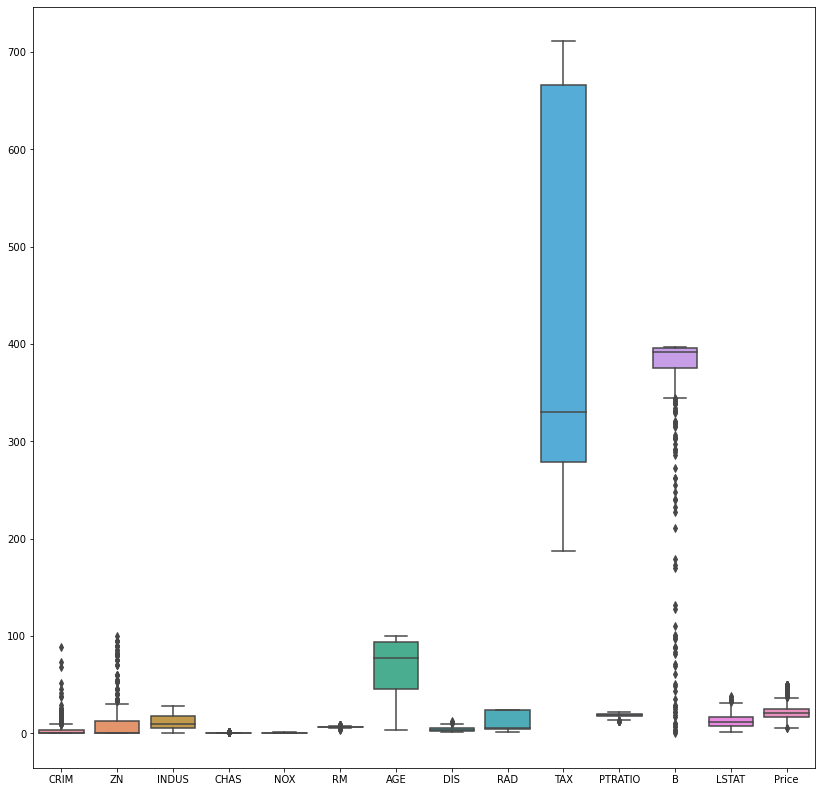

In [18]:
plot.figure(figsize=(14,14))
sns.boxplot(data=df)

In [19]:
df.drop(columns=['B'], axis=1, inplace=True)

In [20]:
Q1 = df.quantile(0.25)
Q3 =df.quantile(0.75)
IQR=Q3-Q1
IQR

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
LSTAT       10.005000
Price        7.975000
dtype: float64

In [21]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [22]:
df.shape

(309, 13)

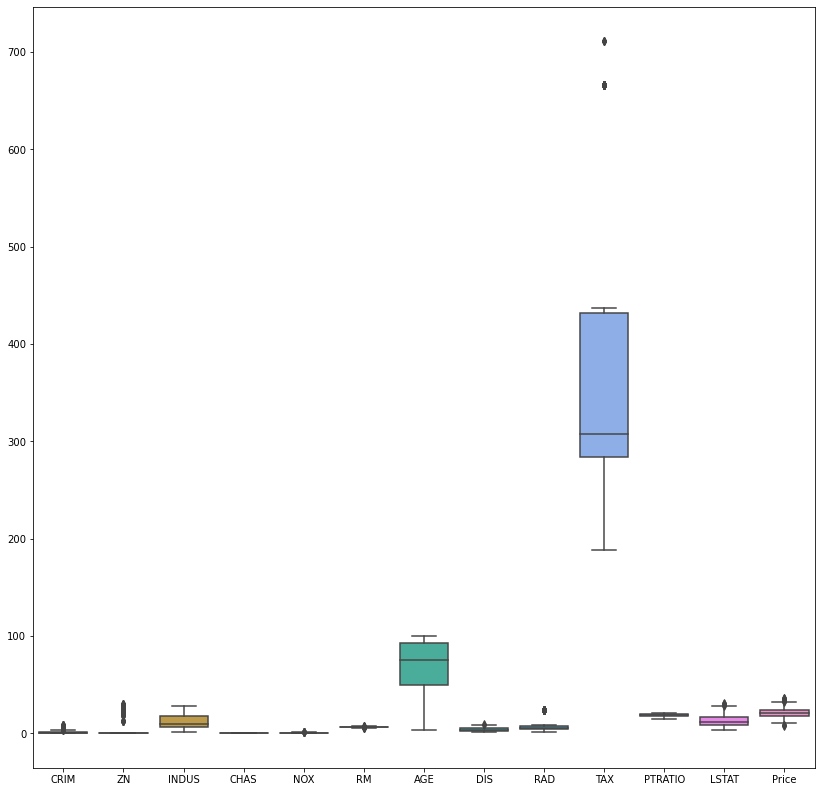

In [23]:
plot.figure(figsize=(14,14))
sns.boxplot(data=df)

###  Splitting Training & Testing data

In [24]:
X = df.iloc[:, 0:12].values
y = df.iloc[:, 12].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

In [26]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (247, 12)
Shape of X_test:  (62, 12)
Shape of y_train:  (247,)
Shape of y_test (62,)


In [27]:
reg = RandomForestRegressor(n_estimators=500, random_state=0)
reg.fit(X_train,y_train.ravel())

RandomForestRegressor(n_estimators=500, random_state=0)

In [28]:
pred_train= reg.predict(X_train)
print("Training Results:")
print("****************")
print("R Squared", metrics.r2_score(y_train,pred_train))
print("MEAN_SQUARED_ERROR",metrics.mean_squared_error(y_train, pred_train))
print("MEAN_ABSOLUTE_ERROR",metrics.mean_absolute_error(y_train,pred_train))
print("ROOT MEAN SQUARED ERROR", np.sqrt(metrics.mean_squared_error(y_train, pred_train)))


Training Results:
****************
R Squared 0.9569118846235017
MEAN_SQUARED_ERROR 1.0506174275303466
MEAN_ABSOLUTE_ERROR 0.7166291497975668
ROOT MEAN SQUARED ERROR 1.0249963061057081


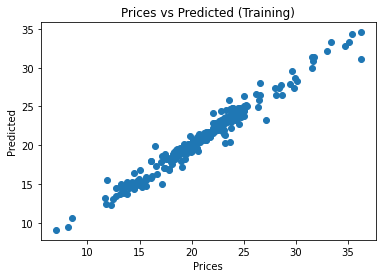

In [29]:
plot.scatter(y_train,pred_train)
plot.xlabel("Prices")
plot.ylabel("Predicted")
plot.title("Prices vs Predicted (Training)")
plot.show()

In [30]:
pred_test = reg.predict(X_test)
print("Testing Results:")
print("****************")
print("R Squared", metrics.r2_score(y_test,pred_test))
print("MEAN_SQUARED_ERROR",metrics.mean_squared_error(y_test, pred_test))
print("MEAN_ABSOLUTE_ERROR",metrics.mean_absolute_error(y_test,pred_test))
print("ROOT MEAN SQUARED ERROR", np.sqrt(metrics.mean_squared_error(y_test, pred_test)))

Testing Results:
****************
R Squared 0.8272976230506188
MEAN_SQUARED_ERROR 4.40008321483869
MEAN_ABSOLUTE_ERROR 1.713770967741935
ROOT MEAN SQUARED ERROR 2.0976375318054097


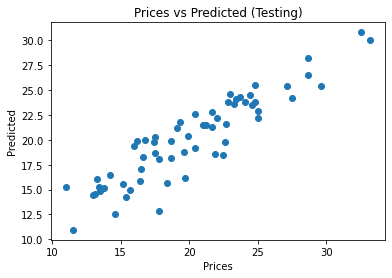

In [31]:
plot.scatter(y_test,pred_test)
plot.xlabel("Prices")
plot.ylabel("Predicted")
plot.title("Prices vs Predicted (Testing)")
plot.show()